# PAGA

Running PAGA for pseudotime + trajectories. Python 3 (singlecell env).

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
from collections import Counter

In [2]:
features = pd.read_csv("../20200206_pmat_snapATAC/sessions/20200220_n74838/features.tsv", sep='\t')
features.head()

,x.sp.sample,umap.1,umap.2,x.sp.cluster,X1,X2,X3,X4,X5,X6,X7,X8,X9
D0_AAACAACGACGATTAC,D0,6.545686,-7.701751,2,-0.009506,0.003827,0.004102,-0.009463,0.001699,-0.006389,0.004263,0.003578,-0.005591
D0_AAACAACGACTCACGG,D0,5.180663,-7.633298,2,-0.009004,0.002892,0.004525,-0.004392,0.000976,-0.010070,0.005721,0.003989,0.000515
D0_AAACATGGAGACTCGC,D0,3.282927,-8.525186,14,-0.009275,0.003295,0.003500,0.000629,-0.004906,-0.005686,0.006394,0.005572,-0.001784
D0_AAACATGGATGGGCCT,D0,5.934059,-7.776163,2,-0.009840,0.003750,0.004400,-0.007725,0.001216,-0.008522,0.006417,0.003613,-0.002014
D0_AAACCGTACCTTTAGG,D0,2.642430,-8.592471,14,-0.008485,0.002944,0.003770,0.000582,-0.004715,-0.001844,0.009901,0.009351,-0.005020


In [7]:
chromvar = pd.read_csv("../20200206_pmat_snapATAC/sessions/20200220_n74838/chromvar.tsv.gz", sep='\t')
chromvar.head()

,sample,cluster,umap1,umap2,NFIL3,FOXF2,FOXD1,IRF2,MZF1,MZF1(var.2),...,RORC,SOX15,TFE3,VDR,EGR1,IRF3,IRF4,IRF5,TCF7L1,SOX2
D0_AAACAACGACGATTAC,D0,2,6.545686,-7.701751,-0.060978,0.129003,0.122682,0.023709,-0.033504,-0.072106,...,-0.103633,-0.127629,0.028897,-0.034020,-0.075238,0.003078,0.064161,-0.002606,-0.087573,-0.225183
D0_AAACAACGACTCACGG,D0,2,5.180663,-7.633298,0.260962,0.034335,0.104098,-0.185325,-0.089781,-0.053416,...,0.104243,-0.219196,0.176370,-0.209792,-0.008061,-0.063759,0.042025,0.032558,-0.064180,-0.140463
D0_AAACATGGAGACTCGC,D0,14,3.282927,-8.525186,-0.106694,0.068541,0.097844,0.083130,-0.059672,-0.012025,...,-0.005575,-0.121243,0.046073,0.001928,-0.003432,-0.002755,0.167567,0.160022,-0.016334,-0.115665
D0_AAACATGGATGGGCCT,D0,2,5.934059,-7.776163,-0.101719,0.107196,0.002820,0.004389,-0.064260,-0.058025,...,0.014628,-0.189544,0.014884,0.021288,-0.060171,-0.019553,0.121987,0.022614,-0.089298,-0.213039
D0_AAACCGTACCTTTAGG,D0,14,2.642430,-8.592471,-0.048504,0.021958,-0.016124,-0.077041,-0.044105,-0.033029,...,-0.012204,-0.182600,-0.031805,0.020603,-0.017879,-0.021854,0.058072,-0.037357,-0.103382,-0.191163


In [86]:
adata = sc.AnnData(X=features.iloc[:,4:], 
                   obs=pd.concat([features.iloc[:,:4], chromvar.iloc[:, 4:]], axis=1))
adata

AnnData object with n_obs × n_vars = 74838 × 9 
    obs: 'x.sp.sample', 'umap.1', 'umap.2', 'x.sp.cluster', 'NFIL3', 'FOXF2', 'FOXD1', 'IRF2', 'MZF1', 'MZF1(var.2)', 'MAX-MYC', 'PPARG', 'Pax6', 'PBX1', 'RORA', 'RORA(var.2)', 'RREB1', 'RXRA-VDR', 'SOX9', 'SPIB', 'SRY', 'TAL1-TCF3', 'REL', 'RELA', 'NR1H2-RXRA', 'NFIC-TLX1', 'ZNF354C', 'CTCF', 'EWSR1-FLI1', 'REST', 'NFATC2', 'INSM1', 'HOXA5', 'RARA-RXRA', 'NR4A2', 'PLAG1', 'ARNT-HIF1A', 'BATF-JUN', 'CDX2', 'DUX4', 'E2F4', 'E2F6', 'FOS', 'FOSL1', 'FOSL2', 'FOXH1', 'HNF4G', 'JUN', 'JUN(var.2)', 'JUNB', 'JUND', 'JUND(var.2)', 'MEF2C', 'MAF-NFE2', 'NFYB', 'NR2C2', 'NRF1', 'POU2F2', 'SMAD2-SMAD3::SMAD4', 'SP2', 'STAT1-STAT2', 'TCF7L2', 'ZBTB33', 'ZNF263', 'CEBPA', 'ELK4', 'ESR2', 'FOXA1', 'IRF1', 'SP1', 'STAT1', 'STAT3', 'GATA1-TAL1', 'USF1', 'YY1', 'FOXP2', 'SREBF1', 'SREBF2', 'THAP1', 'KLF5', 'DMRT3', 'EMX1', 'FOXG1', 'LBX1', 'NFATC3', 'POU6F1', 'SHOX', 'ALX3', 'BARHL2', 'BHLHE41', 'CENPB', 'CREB3', 'DBP', 'EBF1', 'EHF', 'ELF3', 'ELF4', 'ELF

In [ ]:
# use precomputed umap for consistency
adata.obsm['X_umap'] = np.array(features[["umap.1", "umap.2"]])

In [162]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X')

In [ ]:
# re-running diffmaps though these features are diffmap outputs
# is required for dpt
sc.tl.diffmap(adata)

In [163]:
sc.tl.leiden(adata, resolution=0.7)

In [164]:
sc.tl.paga(adata, groups='leiden')

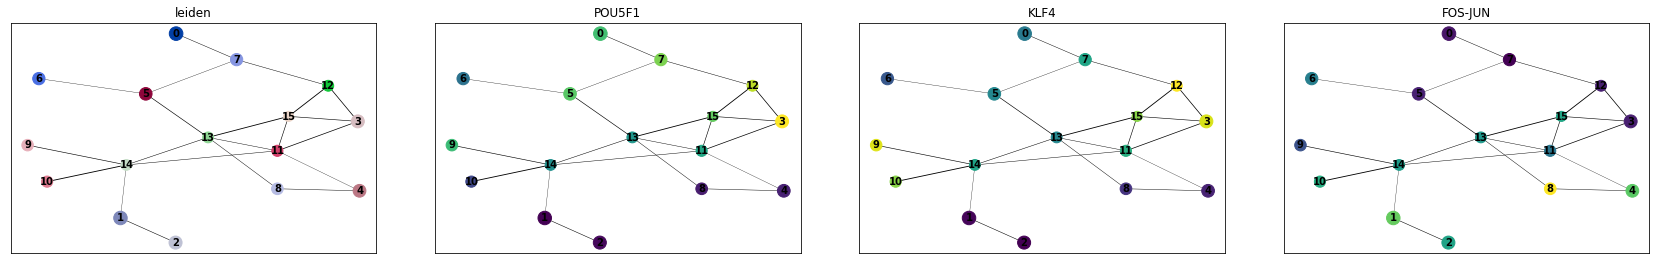

In [165]:
sc.pl.paga(adata, color=['leiden', 'POU5F1', 'KLF4', 'FOS-JUN'], edge_width_scale=0.2, threshold=0.2)

In [153]:
# sc.tl.umap(adata)

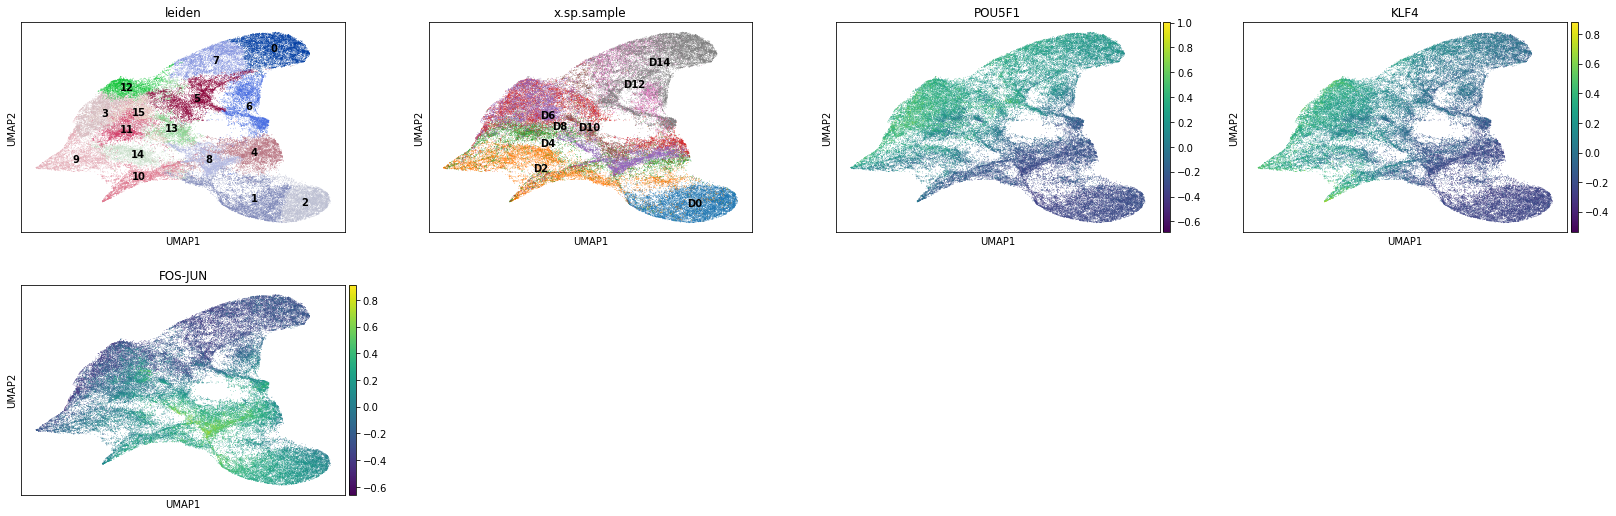

In [166]:
sc.pl.umap(adata, color=['leiden', 'x.sp.sample', 'POU5F1', 'KLF4', 'FOS-JUN'], legend_loc='on data')

In [161]:
Counter(list(adata.obs['x.sp.sample'][(adata.obs['cluster']=="5")]))

Counter({'D10': 177,
         'D12': 74,
         'D14': 100,
         'D2': 2,
         'D4': 204,
         'D6': 2699,
         'D8': 1323})

In [94]:
adata.uns['iroot'] = 0

In [95]:
# features were calculated from diffmap
# adata.obsm['X_diffmap'] = adata.X

In [96]:
sc.tl.dpt(adata)

In [61]:
adata.uns.keys()

odict_keys(['neighbors', 'leiden', 'paga', 'leiden_sizes', 'leiden_colors', 'x.sp.sample_colors', 'iroot'])

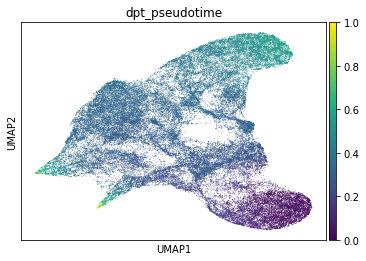

In [148]:
sc.pl.umap(adata, color=['dpt_pseudotime'], legend_loc='on data')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4ad51dcba8>,
            KLF4    POU5F1      SOX2   FOS-JUN  groups  distance
 0     -0.257950 -0.312123 -0.196457  0.124273     2.0  0.005940
 1     -0.257090 -0.311931 -0.196884  0.125396     2.0  0.006098
 2     -0.257419 -0.312162 -0.195629  0.125586     2.0  0.006200
 3     -0.257499 -0.311994 -0.195300  0.126151     2.0  0.006294
 4     -0.258266 -0.312220 -0.195340  0.127052     2.0  0.006382
 ...         ...       ...       ...       ...     ...       ...
 37612 -0.092703  0.122313  0.003036 -0.286166     0.0  0.580536
 37613 -0.088545  0.114946  0.004601 -0.285258     0.0  0.580972
 37614 -0.089967  0.118741  0.007343 -0.285862     0.0  0.581438
 37615 -0.088402  0.123034  0.003295 -0.287914     0.0  0.582015
 37616 -0.092063  0.118967 -0.003280 -0.291918     0.0  0.582606
 
 [37617 rows x 6 columns])

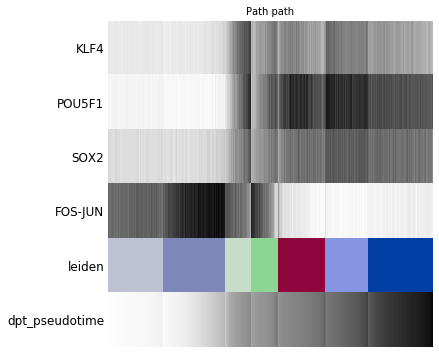

In [167]:
path = [2,1,14,13,5,7,0]
marker_names = ['KLF4', 'POU5F1', 'SOX2', 'FOS-JUN']
sc.pl.paga_path(
        adata, path, marker_names,                         
        show_node_names=False,
#         ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        annotations=['dpt_pseudotime'],
#         show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',
        color_maps_annotations={'distance': 'viridis'},
        title='{} path'.format("Path"),
        return_data=True,
        show=False)

## Write Session Outputs

In [217]:
# write umap coordinates, pseudotime, sample, cluster for downstream analysis
metadata = pd.concat([features.iloc[:,:3], adata.obs[["leiden", "dpt_pseudotime"]]], axis=1)
metadata = metadata.rename(columns={"x.sp.sample":"sample",
                                   "leiden":"cluster"})
metadata.head()

,sample,umap.1,umap.2,cluster,dpt_pseudotime
D0_AAACAACGACGATTAC,D0,6.545686,-7.701751,2,0.000000
D0_AAACAACGACTCACGG,D0,5.180663,-7.633298,2,0.037948
D0_AAACATGGAGACTCGC,D0,3.282927,-8.525186,1,0.107437
D0_AAACATGGATGGGCCT,D0,5.934059,-7.776163,2,0.015411
D0_AAACCGTACCTTTAGG,D0,2.642430,-8.592471,1,0.120589


In [210]:
SESH_NAME = "20200223_n{}".format(metadata.shape[0])
SESH_NAME

'20200223_n74838'

In [211]:
metadata.to_csv("./sessions/{}/metadata.tsv".format(SESH_NAME), sep='\t')

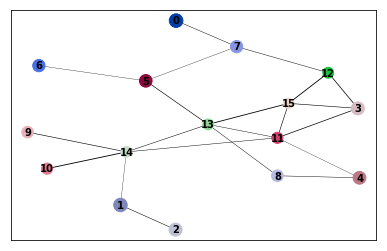

In [212]:
sc.pl.paga(adata, color=['leiden'], edge_width_scale=0.2, threshold=0.2, show=False)
pl.savefig("./sessions/{}/paga.pdf".format(SESH_NAME))